<a href="https://colab.research.google.com/github/cJagno/Sales-Predictions/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [4]:
sales = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/sales_predictions.csv')

In [5]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#sales['Item_Identifier'].value_counts()

In [8]:
#sales['Item_Identifier']


In [9]:
sales.shape

(8523, 12)

In [10]:
out_ident = sales['Outlet_Identifier']== 'OUT045'
out_ident2 = sales['Outlet_Identifier']== 'OUT010'
out_loc3 = sales['Outlet_Location_Type']== 'Tier 3'
out_loc2 = sales['Outlet_Location_Type']== 'Tier 2'
out_loc1 = sales['Outlet_Location_Type']== 'Tier 1'
out_type1 = sales['Outlet_Type']== 'Supermarket Type1'
out_type2 = sales['Outlet_Type']== 'Supermarket Type2'
out_type3 = sales['Outlet_Type']== 'Supermarket Type3'
out_type4 = sales['Outlet_Type']== 'Grocery Store'


In [11]:
#Supermarket Type2 and Type3 = medium Grocery Store = small
sales[out_type1].value_counts('Outlet_Size')

Outlet_Size
Small     1860
High       932
Medium     930
dtype: int64

In [12]:
sales[out_loc3].value_counts('Outlet_Size')

Outlet_Size
Medium    1863
High       932
dtype: int64

In [13]:
sales[out_ident].shape

(929, 12)

In [14]:
sales[out_ident].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440


In [15]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
sales.loc[sales['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales.loc[sales['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales.loc[sales['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [17]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
size_mis = sales['Outlet_Size'].isna()
outtypedf = sales.loc[size_mis,:]
outtypedf['Outlet_Type'].value_counts()
type_grocery = sales['Outlet_Type']== 'Grocery Store'
type_superT1 = sales['Outlet_Type']== 'Supermarket Type1'

In [20]:
#type1filt = sales['Outlet_Type']== 'Supermarket Type1'
sales.fillna(sales.mean(),inplace=True)
#sales.loc[out2df,:].fillna('High', inplace=True) 
#grocerytypedf = outtypedf.loc[outtypeGdf, :]
#grocerytypedf.loc[0:, 'Outlet_Size'].fillna('Small', inplace=True)
#supertype1df = outtypedf.loc[outtypeT1df,:]
#supertype1df.loc[0:, 'Outlet_Size'].fillna('High', inplace=True)
#sales.loc[type_grocery & size_mis].fillna('Small', inplace=True)
#sales.loc[size_mis & type_superT1].fillna('High', inplace=True)
sales.loc[0:, 'Outlet_Size'].fillna('High', inplace=True)

In [21]:
#Supermarket type1= mixed Type2 and Type3 = medium Grocery Store = small
sales['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW26     9
DRE49     9
FDX04     9
         ..
FDO33     1
FDN52     1
FDQ60     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [22]:
size = sales['Outlet_Size'].values
item = sales['Item_Identifier'].values
item_sale =  sales['Item_Outlet_Sales'].values
sns.set_theme(style="darkgrid")


In [23]:
sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
item1 = sales['Item_Identifier']== 'FDG33'
item1_type1df = sales.loc[item1 & out_type1]
item1_type2df = sales.loc[item1 & out_type2]
item1_type3df = sales.loc[item1 & out_type3]
item1_type4df = sales.loc[item1 & out_type4]
item1_pricetype1 = item1_type1df['Item_Outlet_Sales'].values.sum()
item1_pricetype2 = item1_type2df['Item_Outlet_Sales'].values.sum()
item1_pricetype3 = item1_type3df['Item_Outlet_Sales'].values.sum()
item1_pricetype4 = item1_type4df['Item_Outlet_Sales'].values.sum()
item2 = sales['Item_Identifier']== 'NCI54'
item2_type1df = sales.loc[item2 & out_type1]
item2_type2df = sales.loc[item2 & out_type2]
item2_type3df = sales.loc[item2 & out_type3]
item2_type4df = sales.loc[item2 & out_type4]
item2_pricetype1 = item2_type1df['Item_Outlet_Sales'].values.sum()
item2_pricetype2 = item2_type2df['Item_Outlet_Sales'].values.sum()
item2_pricetype3 = item2_type3df['Item_Outlet_Sales'].values.sum()
item2_pricetype4 = item2_type4df['Item_Outlet_Sales'].values.sum()
item3 = sales['Item_Identifier']== 'FDF52'
item3_type1df = sales.loc[item3 & out_type1]
item3_type2df = sales.loc[item3 & out_type2]
item3_type3df = sales.loc[item3 & out_type3]
item3_type4df = sales.loc[item3 & out_type4]
item3_pricetype1 = item3_type1df['Item_Outlet_Sales'].values.sum()
item3_pricetype2 = item3_type2df['Item_Outlet_Sales'].values.sum()
item3_pricetype3 = item3_type3df['Item_Outlet_Sales'].values.sum()
item3_pricetype4 = item3_type4df['Item_Outlet_Sales'].values.sum()
item3_type4df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6002,FDF52,9.300000,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,High,Tier 3,Grocery Store,182.4292
8030,FDF52,12.857645,Low Fat,0.116929,Frozen Foods,183.3292,OUT019,1985,Small,Tier 1,Grocery Store,364.8584


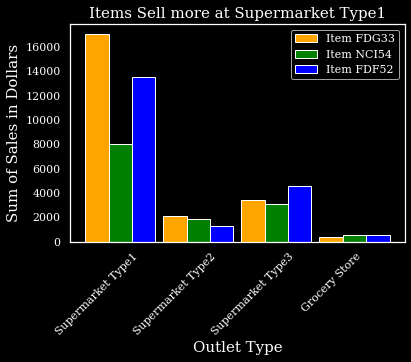

In [25]:
#x = type, y = sales
x_bar = ['Supermarket Type1','Supermarket Type2', 'Supermarket Type3', 'Grocery Store']
y_bar1 = [item1_pricetype1, item1_pricetype2, item1_pricetype3, item1_pricetype4]
y_bar2 = [item2_pricetype1, item2_pricetype2, item2_pricetype3, item2_pricetype4]
y_bar3 = [item3_pricetype1, item3_pricetype2, item3_pricetype3, item3_pricetype4]
positions = [0, 1, 2, 3]
positions2 = [.3, 1.3, 2.3, 3.3]
positions3 = [.6, 1.6, 2.6, 3.6]
plt.rcParams['font.family'] = 'serif'
plt.style.use('dark_background')
plt.bar(positions, y_bar1, width= .3, color= 'Orange', label = 'Item FDG33')
plt.bar(positions2, y_bar2, width= .3, color= 'Green', label = 'Item NCI54')
plt.bar(positions3, y_bar3, width= .3, color= 'Blue', label = 'Item FDF52')
plt.xticks(positions, x_bar, rotation = 45)
plt.title('Items Sell more at Supermarket Type1',fontsize= 15)
plt.ylabel('Sum of Sales in Dollars',fontsize= 15)
plt.xlabel('Outlet Type',fontsize= 15)
plt.grid(False)
plt.legend()
plt.savefig('SupermarketType1.png', dpi = 300)

In [26]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [27]:
grocery_filter = sales['Outlet_Type']=='Grocery Store'
supermarkettype1_filter = sales['Outlet_Type']=='Supermarket Type1'
supermarkettype2_filter = sales['Outlet_Type']=='Supermarket Type2'
supermarkettype3_filter = sales['Outlet_Type']=='Supermarket Type3'
year2009_filter = sales['Outlet_Establishment_Year']==2009
year1999_filter = sales['Outlet_Establishment_Year']==1999
year1998_filter = sales['Outlet_Establishment_Year']==1998
year1997_filter = sales['Outlet_Establishment_Year']==1997
year1985_filter = sales['Outlet_Establishment_Year']==1985
year1987_filter = sales['Outlet_Establishment_Year']==1987
year2004_filter = sales['Outlet_Establishment_Year']==2004
year2002_filter = sales['Outlet_Establishment_Year']==2002
year2007_filter = sales['Outlet_Establishment_Year']==2007
grocerydf = sales.loc[grocery_filter,:]
supermarkettype1df2007 = sales[supermarkettype1_filter & year2007_filter]
supermarkettype1df1987 = sales[supermarkettype1_filter & year1987_filter]
supermarkettype1df1999 = sales[supermarkettype1_filter & year1999_filter]
supermarkettype1df2004 = sales[supermarkettype1_filter & year2004_filter]
supermarkettype1df2002 = sales[supermarkettype1_filter & year2002_filter]
supermarkettype1df1997 = sales[supermarkettype1_filter & year1997_filter]
supermarkettype1df = sales.loc[supermarkettype1_filter,:]
supermarkettype2df2009 = sales[supermarkettype2_filter & year2009_filter]
supermarkettype2df = sales.loc[supermarkettype2_filter,:]
supermarkettype3df1985 = sales[supermarkettype3_filter & year1985_filter]
supermarkettype3df = sales.loc[supermarkettype3_filter,:]
#supermarkettype1df['Outlet_Establishment_Year'].value_counts()
#1987 1999 1997 2004 2002 2007
supermarkettype1sales1987 = supermarkettype1df1987['Item_Outlet_Sales'].values.sum()
supermarkettype1sales1999 = supermarkettype1df1999['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2007 = supermarkettype1df2007['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2004 = supermarkettype1df2004['Item_Outlet_Sales'].values.sum()
supermarkettype1sales2002 = supermarkettype1df2002['Item_Outlet_Sales'].values.sum()
supermarkettype1sales1997 = supermarkettype1df1997['Item_Outlet_Sales'].values.sum()
supermarkettype2sales2009 = supermarkettype2df2009['Item_Outlet_Sales'].values.sum()
supermarkettype3sales1985 = supermarkettype3df1985['Item_Outlet_Sales'].values.sum()
grocerydf['Outlet_Establishment_Year'].value_counts()


1998    555
1985    528
Name: Outlet_Establishment_Year, dtype: int64

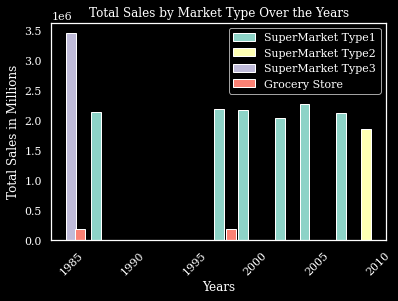

In [28]:
# OUT010, OUT019 only grocery stores type3 85, type2 09, type1 87,97,99,04,02,07, grocery 98, 85
grocerydf1998 = grocerydf.loc[year1998_filter,:]
grocerydf1985 = grocerydf.loc[year1985_filter,:]
grocery1985sales = grocerydf1985['Item_Outlet_Sales'].values.sum()
grocery1998sales = grocerydf1998['Item_Outlet_Sales'].values.sum()
#out019_filter = sales['Outlet_Identifier']=='OUT019'
#out019df = sales.loc[out019_filter,:]
#out019df['Outlet_Establishment_Year'].value_counts()
x1 = [1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009]
#yo= [  0   , 1   , 2  ,  3  ,  4  ,  5  ,  6  ,  7  ,  8]
#positions = [1, 2, 4, 5, 6, 7]
#positions2 = [8]
#positions3 = [0]
#positions4 = [.3,3]
positions = [1987, 1997, 1999, 2002, 2004, 2007]
positions2 = [2009]
positions3 = [1985]
positions4 = [1985.7,1998]
y1 = [supermarkettype1sales1987, supermarkettype1sales1999, supermarkettype1sales2007, supermarkettype1sales2002,
      supermarkettype1sales2004, supermarkettype1sales1997]
y2 = [supermarkettype2sales2009]
y3 = [supermarkettype3sales1985]
y4 = [grocery1985sales, grocery1998sales]
plt.bar(positions, y1, label = 'SuperMarket Type1')
plt.bar(positions2, y2, label = 'SuperMarket Type2')
plt.bar(positions3, y3, label = 'SuperMarket Type3')
plt.bar(positions4, y4,label = 'Grocery Store')
plt.xticks( rotation=45)
plt.ylabel('Total Sales in Millions')
plt.xlabel("Years")
plt.title('Total Sales by Market Type Over the Years')
plt.legend()
plt.grid(False)

In [29]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type1 Item Sales in Established Year vs Latest Year')

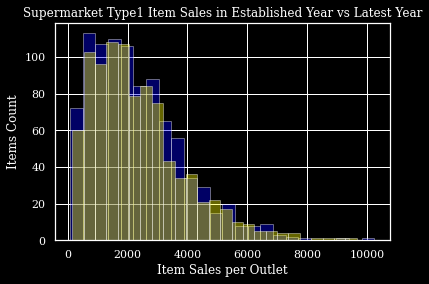

In [30]:
sns.distplot(supermarkettype1df1987['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type1 1987', color='blue')
sns.distplot(supermarkettype1df2007['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type1 2007', color='yellow')

sns.choose_light_palette
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type1 Item Sales in Established Year vs Latest Year')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type2 Item Sales in Established Year')

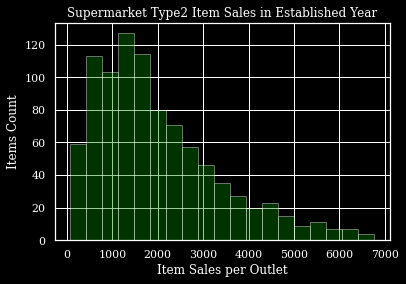

In [31]:
sns.distplot(supermarkettype2df2009['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type2 Item Sales', color='green')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type2 Item Sales in Established Year')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Supermarket Type3 Item Sales in Established')

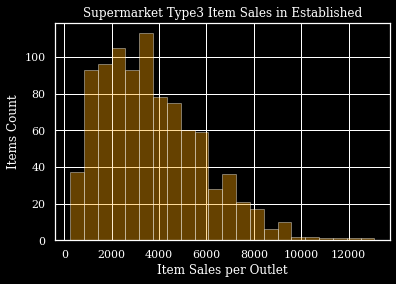

In [32]:
sns.distplot(supermarkettype3df1985['Item_Outlet_Sales'], kde=False, label= 'Supermarket Type3 1985', color='orange')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Supermarket Type3 Item Sales in Established')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Grocery Market Item Sales in Established Year vs Latest Year')

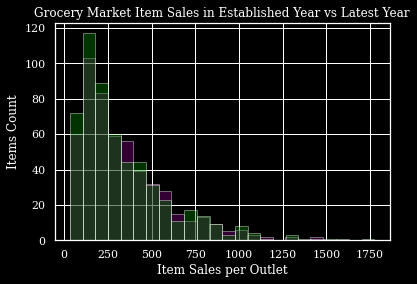

In [33]:
sns.distplot(grocerydf1985['Item_Outlet_Sales'], kde=False, label= 'Grocery Market 1985', color='purple')
sns.distplot(grocerydf1998['Item_Outlet_Sales'], kde=False, label= 'Grocery Market 1998', color='green')
plt.xlabel('Item Sales per Outlet')
plt.ylabel("Items Count")
plt.title('Grocery Market Item Sales in Established Year vs Latest Year')

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
one_sales = pd.get_dummies(sales, columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type' ], drop_first = True)
one_sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,...,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [36]:
one_sales.shape

(8523, 1602)

In [54]:
one_sales.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Item_Outlet_Sales                float64
Item_Identifier_DRA24              uint8
                                  ...   
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Length: 1602, dtype: object

In [38]:
one_df = sales.loc[:, ['Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Item_Outlet_Sales']]
one_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [39]:
'''one_df['Item_Type'] = one_df['Item_Type'].replace({'Fruits and Vegetables': 1 ,
                                                   'Snack Foods': 2 ,
                                                   'Household': 3 ,
                                                   'Frozen Foods': 4 ,
                                                   'Dairy': 5 ,
                                                   'Canned': 6 ,
                                                   'Baking Goods': 7 ,
                                                   'Health and Hygiene': 8 ,
                                                   'Soft Drinks': 9 ,
                                                   'Meat': 10 ,
                                                   'Breads': 11 ,
                                                   'Hard Drinks': 12 ,
                                                   'Others': 13 ,
                                                   'Starchy Foods': 14 ,
                                                   'Breakfast': 15 ,
                                                   'Seafood': 16 ,}'''

In [40]:
'''one_df['Outlet_Identifier'] = one_df['Outlet_Identifier'].replace({'OUT027': 27,
                                                                   'OUT013': 13,
                                                                   'OUT035': 35,
                                                                   'OUT049': 49,
                                                                   'OUT046': 46,
                                                                   'OUT045': 45,
                                                                   'OUT018': 18,
                                                                   'OUT017': 17,
                                                                   'OUT010': 10,
                                                                   'OUT019': 19,})'''

In [41]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Type          8523 non-null   int64  
 1   Item_MRP           8523 non-null   float64
 2   Outlet_Identifier  8523 non-null   int64  
 3   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 266.5 KB


In [61]:
X= one_sales.drop(columns= 'Item_Outlet_Sales')

In [62]:
X.shape

(8523, 1601)

In [64]:
y = one_sales.loc[:,'Item_Outlet_Sales' ].values

In [65]:
y.shape

(8523,)

In [66]:
reg = LinearRegression(fit_intercept=True)

In [67]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
reg.predict(X)

array([5342.70350647,  375.73353577, 1931.21913147, ..., 1152.50892639,
       1766.56166077, 1274.53163147])

In [69]:
score= reg.score(X,y)
print(score)

0.643323064012215


,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,5,249.8092,49,3735.1380
1,9,48.2692,18,443.4228
2,10,141.6180,49,2097.2700
3,1,182.0950,10,732.3800
4,3,53.8614,13,994.7052
